In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Tensors
Tensors are the PyTorch equivalent to Numpy arrays, with the addition to also have support for GPU acceleration. The name "tensor" is a generalization of concepts. For instance, a vector is a 1-D tensor, and a matrix a 2-D tensor. When working with neural networks, tensors of various shapes and number of dimensions are used.

Most common functions from numpy can be used on tensors as well. Actually, since numpy arrays are so similar to tensors, tensors could be converted to numpy arrays (and back).

In [ ]:
# Generate a toy regression dataset
X, y = make_regression(n_samples=5000, n_features=20, noise=0.1, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float().unsqueeze(1)
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float().unsqueeze(1)





# Dataloader
PyTorch offers a solution for parallelizing the data loading process with automatic batching by using DataLoader. Dataloader has been used to parallelize the data loading as this boosts up the speed and saves memory.

In [ ]:
# Create PyTorch datasets and data loaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [ ]:
for (x,y) in train_loader:
    print(x.shape)
    print(y.shape)

torch.Size([128, 20])
torch.Size([128, 1])
torch.Size([128, 20])
torch.Size([128, 1])
torch.Size([128, 20])
torch.Size([128, 1])
torch.Size([128, 20])
torch.Size([128, 1])
torch.Size([128, 20])
torch.Size([128, 1])
torch.Size([128, 20])
torch.Size([128, 1])
torch.Size([128, 20])
torch.Size([128, 1])
torch.Size([128, 20])
torch.Size([128, 1])
torch.Size([128, 20])
torch.Size([128, 1])
torch.Size([128, 20])
torch.Size([128, 1])
torch.Size([128, 20])
torch.Size([128, 1])
torch.Size([128, 20])
torch.Size([128, 1])
torch.Size([128, 20])
torch.Size([128, 1])
torch.Size([128, 20])
torch.Size([128, 1])
torch.Size([128, 20])
torch.Size([128, 1])
torch.Size([128, 20])
torch.Size([128, 1])
torch.Size([128, 20])
torch.Size([128, 1])
torch.Size([128, 20])
torch.Size([128, 1])
torch.Size([128, 20])
torch.Size([128, 1])
torch.Size([128, 20])
torch.Size([128, 1])
torch.Size([128, 20])
torch.Size([128, 1])
torch.Size([128, 20])
torch.Size([128, 1])
torch.Size([128, 20])
torch.Size([128, 1])
torch.Size(

In [ ]:
# Define the neural network model
class RegressionNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size): # Constructer
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) # Fully connected layer
        self.relu = nn.ReLU() # ReLU activation function
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out



# Summary of the model

In [ ]:
!pip install torchsummary

In [ ]:
from torchsummary import summary
input_size = X_train.shape[1]
hidden_size = 32
output_size = 1
model = RegressionNet(input_size, hidden_size, output_size)
summary(model,(20,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 32]             672
              ReLU-2                   [-1, 32]               0
            Linear-3                    [-1, 1]              33
Total params: 705
Trainable params: 705
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
model

RegressionNet(
  (fc1): Linear(in_features=20, out_features=2, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)

Epoch [20/600], Loss: 2.2938, Test Loss: 3.1120
Epoch [40/600], Loss: 0.8770, Test Loss: 1.2934
Epoch [60/600], Loss: 0.5166, Test Loss: 0.7872
Epoch [80/600], Loss: 0.3601, Test Loss: 0.5831
Epoch [100/600], Loss: 0.2694, Test Loss: 0.4419
Epoch [120/600], Loss: 0.2068, Test Loss: 0.3620
Epoch [140/600], Loss: 0.1689, Test Loss: 0.3208
Epoch [160/600], Loss: 0.1451, Test Loss: 0.2758
Epoch [180/600], Loss: 0.1267, Test Loss: 0.2421
Epoch [200/600], Loss: 0.1097, Test Loss: 0.2100
Epoch [220/600], Loss: 0.0950, Test Loss: 0.1950
Epoch [240/600], Loss: 0.0853, Test Loss: 0.1765
Epoch [260/600], Loss: 0.0771, Test Loss: 0.1651
Epoch [280/600], Loss: 0.0718, Test Loss: 0.1532
Epoch [300/600], Loss: 0.0647, Test Loss: 0.1433
Epoch [320/600], Loss: 0.0607, Test Loss: 0.1294
Epoch [340/600], Loss: 0.0561, Test Loss: 0.1216
Epoch [360/600], Loss: 0.0532, Test Loss: 0.1150
Epoch [380/600], Loss: 0.0493, Test Loss: 0.1089
Epoch [400/600], Loss: 0.0470, Test Loss: 0.1011
Epoch [420/600], Loss: 0

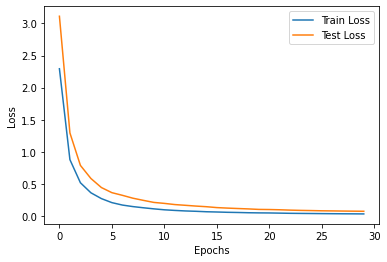

In [ ]:
# Instantiate the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 32
output_size = 1
model = RegressionNet(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Train the model
num_epochs = 600  # Reduced number of epochs

train_loss_history=[]
test_loss_history=[]
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    if (epoch + 1) % 20 == 0:
        # Evaluate on the test set
        test_loss = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                test_loss += criterion(outputs, labels).item()
        test_loss /= len(test_loader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Test Loss: {test_loss:.4f}')

        train_loss_history.append(running_loss/len(train_loader))
        test_loss_history.append(test_loss)

# Plot the training loss vs testing loss

plt.plot(train_loss_history, label='Train Loss')
plt.plot(test_loss_history, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the trained model

In [ ]:
torch.save(model,'model.pth')

# Load the trained model and evaluate

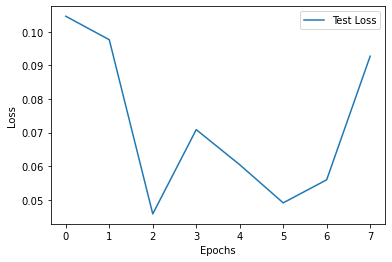

In [ ]:
model=torch.load('model.pth')
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)  # Increased learning rate

# Train the model
num_epochs = 600  # Reduced number of epochs


test_loss_history=[]



#test_loss = 0.0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)

        test_loss_history.append(criterion(outputs, labels).item())

        #print('Test Loss: {test_loss:.4f}')







plt.plot(test_loss_history, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


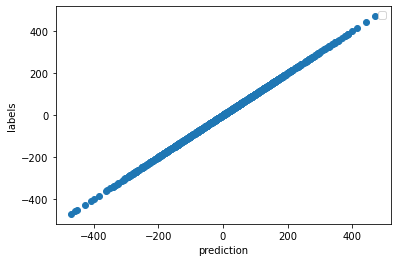

In [ ]:
prediction=model(X_test)

plt.scatter(prediction.detach().cpu(),y_test)
plt.xlabel('prediction')
plt.ylabel('labels')
plt.legend()
plt.show()

# Underfitting

Epoch [20/600], Loss: 0.0102, Test Loss: 0.0111
Epoch [40/600], Loss: 0.0103, Test Loss: 0.0108
Epoch [60/600], Loss: 0.0101, Test Loss: 0.0110
Epoch [80/600], Loss: 0.0103, Test Loss: 0.0110
Epoch [100/600], Loss: 0.0103, Test Loss: 0.0117
Epoch [120/600], Loss: 0.0103, Test Loss: 0.0122
Epoch [140/600], Loss: 0.0103, Test Loss: 0.0112
Epoch [160/600], Loss: 0.0102, Test Loss: 0.0112
Epoch [180/600], Loss: 0.0102, Test Loss: 0.0111
Epoch [200/600], Loss: 0.0104, Test Loss: 0.0112
Epoch [220/600], Loss: 0.0103, Test Loss: 0.0116
Epoch [240/600], Loss: 0.0102, Test Loss: 0.0107
Epoch [260/600], Loss: 0.0102, Test Loss: 0.0110
Epoch [280/600], Loss: 0.0101, Test Loss: 0.0118
Epoch [300/600], Loss: 0.0103, Test Loss: 0.0111
Epoch [320/600], Loss: 0.0102, Test Loss: 0.0113
Epoch [340/600], Loss: 0.0102, Test Loss: 0.0114
Epoch [360/600], Loss: 0.0103, Test Loss: 0.0109
Epoch [380/600], Loss: 0.0103, Test Loss: 0.0114
Epoch [400/600], Loss: 0.0103, Test Loss: 0.0111
Epoch [420/600], Loss: 0

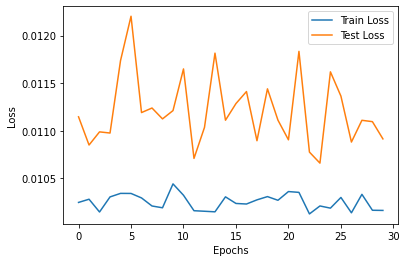

In [ ]:
hidden_size = 2  # Extremely small hidden size to underfit
output_size = 1
model = RegressionNet(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Train the model
num_epochs = 600  # Reduced number of epochs

train_loss_history=[]
test_loss_history=[]
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    if (epoch + 1) % 20 == 0:
        # Evaluate on the test set
        test_loss = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                test_loss += criterion(outputs, labels).item()
        test_loss /= len(test_loader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Test Loss: {test_loss:.4f}')

        train_loss_history.append(running_loss/len(train_loader))
        test_loss_history.append(test_loss)


plt.plot(train_loss_history, label='Train Loss')
plt.plot(test_loss_history, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Overfitting

Epoch [20/600], Loss: 1.9189, Test Loss: 2.5658
Epoch [40/600], Loss: 1.0565, Test Loss: 1.7473
Epoch [60/600], Loss: 0.7486, Test Loss: 1.5544
Epoch [80/600], Loss: 0.5804, Test Loss: 1.4748
Epoch [100/600], Loss: 0.4555, Test Loss: 1.3673
Epoch [120/600], Loss: 0.3815, Test Loss: 1.3224
Epoch [140/600], Loss: 0.3203, Test Loss: 1.2828
Epoch [160/600], Loss: 0.2824, Test Loss: 1.2523
Epoch [180/600], Loss: 0.2491, Test Loss: 1.2350
Epoch [200/600], Loss: 0.2178, Test Loss: 1.1998
Epoch [220/600], Loss: 0.1939, Test Loss: 1.1879
Epoch [240/600], Loss: 0.1765, Test Loss: 1.1516
Epoch [260/600], Loss: 0.1598, Test Loss: 1.1588
Epoch [280/600], Loss: 0.1462, Test Loss: 1.1464
Epoch [300/600], Loss: 0.1355, Test Loss: 1.1304
Epoch [320/600], Loss: 0.1234, Test Loss: 1.1224
Epoch [340/600], Loss: 0.1173, Test Loss: 1.1160
Epoch [360/600], Loss: 0.1096, Test Loss: 1.1051
Epoch [380/600], Loss: 0.1008, Test Loss: 1.1001
Epoch [400/600], Loss: 0.0944, Test Loss: 1.0959
Epoch [420/600], Loss: 0

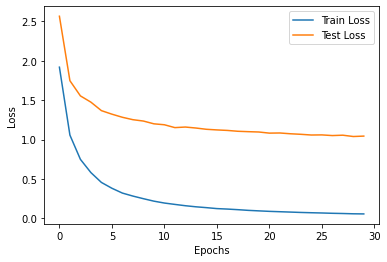

In [ ]:
hidden_size = 600  # Extremely high hidden size to overfit
output_size = 1
model = RegressionNet(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Train the model
num_epochs = 600  # Reduced number of epochs

train_loss_history=[]
test_loss_history=[]
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    if (epoch + 1) % 20 == 0:
        # Evaluate on the test set
        test_loss = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                test_loss += criterion(outputs, labels).item()
        test_loss /= len(test_loader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Test Loss: {test_loss:.4f}')

        train_loss_history.append(running_loss/len(train_loader))
        test_loss_history.append(test_loss)


plt.plot(train_loss_history, label='Train Loss')
plt.plot(test_loss_history, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Layer-wise parameters shape

In [ ]:
for parameter in model.parameters():
    print(parameter.shape)

torch.Size([32, 20])
torch.Size([32])
torch.Size([1, 32])
torch.Size([1])


# Number of parameters and flops

In [ ]:
from flopth import flopth
flops, params = flopth(model, in_size=(20,),show_detail=True)
print(flops, params)

+---------------+---------------+------------+-------------+------------------------------+----------+------------------+-------------------------------------------------+---------+-----------------+-----------------------------------------------+
| module_name   | module_type   | in_shape   | out_shape   | kernel_size,padding,stride   |   params | params_percent   | params_percent_vis                              |   flops | flops_percent   | flops_percent_vis                             |
+===============+===============+============+=============+==============================+==========+==================+=================================================+=========+=================+===============================================+
| fc1           | Linear        | (20)       | (32)        |                              |      672 | 95.3191%         | ############################################### |     640 | 90.9091%        | ############################################# |
+-------